# Data analysis: Digital
### October 25th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 04/10/2021




## Configuration

### Clone the GIT

In [ ]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

GitHub uservaleriopagliarino
GitHub emailvalerio.pagliarino@edu.unito.it
GitHub password··········
Cloning into 'Electronics-2021-UNITO'...
remote: Enumerating objects: 2242, done.
remote: Counting objects: 100% (2242/2242), done.
remote: Compressing objects: 100% (1642/1642), done.
remote: Total 2242 (delta 1233), reused 1258 (delta 571), pack-reused 0
Receiving objects: 100% (2242/2242), 91.79 MiB | 26.01 MiB/s, done.
Resolving deltas: 100% (1233/1233), done.


### Install environment

In [ ]:
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

### Importa moduli [no COLAB]

In [1]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

DATADIR = "../data-source"
OUTPUTDIR = "./output"

Welcome to JupyROOT 6.24/06


### Importa moduli [COLAB]

In [ ]:
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle #Pickle with dict of Numpy arrays

# Variables for directories
DATADIR = "/content/Electronics-2021-UNITO/data-source"
OUTPUTDIR = "/content/Electronics-2021-UNITO/analysis/output"

     |████████████████████████████████| 98 kB 3.4 MB/s eta 0:00:011


### Funzioni per l'importazione file Tektronix

In [2]:
import csv

def cellFromCSV(path, row_index, col_index):
  with open(path, 'r') as f:
    mycsv = csv.reader(f)
    column = []
    for row in mycsv:
        column.append(row[col_index])

  return column[row_index]


def openTek(path):
  a = pd.read_table(path, header=None, sep=",", usecols=[3,4])
  a = a.transpose()
  a = a.rename(index={3: 'Time', 4: 'Amplitude'})
  a = a.transpose()

  data = {'Record lenght': cellFromCSV(path, 0, 1),
          'Sample interval': cellFromCSV(path, 1, 1),
          'Trigger point': cellFromCSV(path, 2, 1),
          'Source': cellFromCSV(path, 6, 1),
          'Vertical units': cellFromCSV(path, 7, 1),
          'Vertical scale': cellFromCSV(path, 8, 1),
          'Vertical offset': cellFromCSV(path, 9, 1),
          'Horizontal units': cellFromCSV(path, 10, 1),
          'Horizontal scale': cellFromCSV(path, 11, 1),
          'Pt FMT': cellFromCSV(path, 12, 1),
          'Y zero': cellFromCSV(path, 13, 1),
          'Probe atten': cellFromCSV(path, 14, 1),
          'Model': cellFromCSV(path, 15, 1),
          'Serial': cellFromCSV(path, 16, 1),
          'Firmware': cellFromCSV(path, 17, 1),
          'Data' : a
  }
  return data

## Ring oscillator

In [3]:
in_osc = pd.read_csv(f'{DATADIR}/25-10-21/ring-oscillator.csv')

time_osc = in_osc.to_numpy().transpose()[0]
sign_osc = in_osc.to_numpy().transpose()[1]


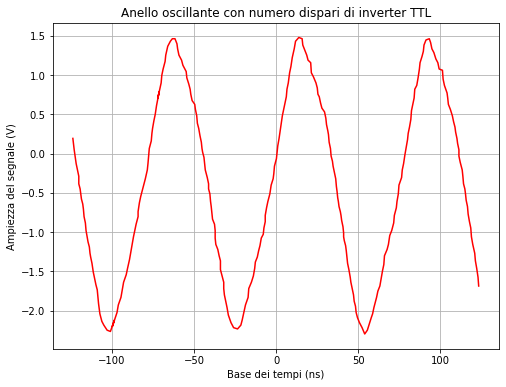

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(time_osc, sign_osc, color = "red", label = "Segnale oscillante ")
ax.set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale (V)',
       title='Anello oscillante con numero dispari di inverter TTL')

ax.grid()

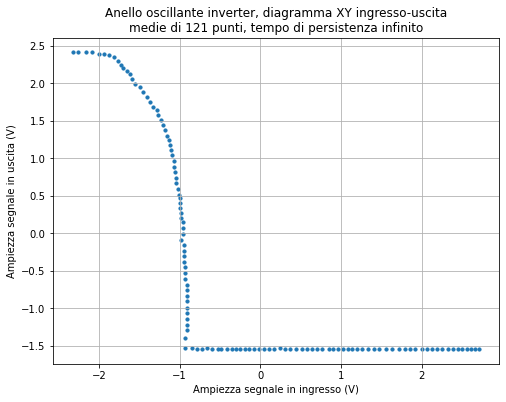

In [5]:
oscXY = pd.read_csv(f'{DATADIR}/25-10-21/XY-inVSout-NOT.csv')
x_data = oscXY.to_numpy().transpose()[0]    #Offset traslazione canali
y_data = oscXY.to_numpy().transpose()[1]   #Offset traslazione canali

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8, 6))
ax.scatter(x_data, y_data, s=10)

ax.set(xlabel='Ampiezza segnale in ingresso (V)', ylabel='Ampiezza segnale in uscita (V)',
       title='Anello oscillante inverter, diagramma XY ingresso-uscita\nmedie di 121 punti, tempo di persistenza infinito')

ax.grid()

#plt.savefig(f"{OUTPUTDIR}/OPA-log-AMP-XY.pdf")
